In [1]:
import numpy as np
import pandas as pd
import os
import cv2 
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
from tqdm import tqdm_notebook 

In [2]:
#! kaggle competitions download -c histopathologic-cancer-detection

In [3]:
TRAIN_DATA_DIRECTORY = '/Users/nitinmahajan/histopathologic-cancer-detection/train/'
TRAIN_LABEL = '/Users/nitinmahajan/histopathologic-cancer-detection/train_labels.csv'
TEST_DATA_DIRECTORY = '/Users/nitinmahajan/histopathologic-cancer-detection/test/'

In [4]:
print(
    'Number of images in TRAIIN dataset =',
    len(
        os.listdir(
            '/Users/nitinmahajan/histopathologic-cancer-detection/train')))

print(
    'Number of images in TEST dataset =',
    len(os.listdir(
        '/Users/nitinmahajan/histopathologic-cancer-detection/test')))

Number of images in TRAIIN dataset = 220025
Number of images in TEST dataset = 57458


In [5]:
#Data set
df = pd.read_csv ('/Users/nitinmahajan/histopathologic-cancer-detection/train_labels.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220025 entries, 0 to 220024
Data columns (total 2 columns):
id       220025 non-null object
label    220025 non-null int64
dtypes: int64(1), object(1)
memory usage: 3.4+ MB


__1. Only two columns present in the data set.__

__2. No missing values__

In [7]:
df['label'].value_counts()

0    130908
1     89117
Name: label, dtype: int64

__Negative/positive ratio is not entirely 50/50 as there are approx 130k negatives and 90k positives. The ratio is closer to 60/40 meaning that there are 1.5 times more negative images than positives. I wont count this is as unbalanced data though__

In [8]:
 ####Define a fucntion to print the images #################

def print_images(tdd, df, column, n_images):
    unique_categories = (df.groupby([column])[column].unique()).index
    fig, ax = plt.subplots(nrows=len(unique_categories),
                           ncols=n_images,
                           figsize=(2 * n_images,2 * len(unique_categories)))

    for i, category in enumerate(unique_categories):
        im = df[df[column] == category].sample(
            n_images)  # n_images is also the sample size
        for j in range(0, n_images):
            file = tdd + im.iloc[j]['id'] + '.tif'
            img = cv2.imread(file)
            ax[i, j].imshow(img, resample=True, cmap='gray')
            color = ['red' if df.iloc[i].label == 1 else 'blue'][0]
            ax[i, j].set_title(category, fontsize=20, color=color)
    plt.tight_layout()
    plt.show()
    return

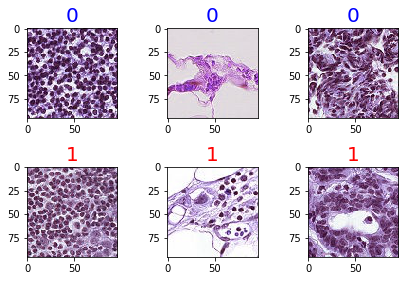

In [9]:
print_images(TRAIN_DATA_DIRECTORY,df,'label',3)

In [10]:
# subsetting 10,000 images with labels 1 and 0
SAMPLE_SIZE = 10000
df_normal = df[df['label'] == 0].sample(SAMPLE_SIZE, random_state = 42)
df_cancer = df[df['label'] == 1].sample(SAMPLE_SIZE, random_state = 42)

# Join the two data frame, so that both cancer and normal got in one data frame, 
## Remember to shuffle the data set , to avaoid biasing
df_subset = pd.concat([df_normal, df_cancer], axis=0).reset_index(drop=True)

#shuffle the dataframe using shuffle 
from sklearn.utils import shuffle
df_subset = shuffle(df_subset)

df_subset.head()

,id,label
987,86782e80c2045492ad62f166d45d72a9dc5ce88b,0
18252,8f33c6278dc9c98db1efed495c6ba672da89f7a0,1
11850,b12392eb9fbd9a0bbaa1ba621f0c2659b240790d,1
15298,6e5b808b90c63e2f2a6875e893fe9a4a6b0e0bc4,1
5637,bccfe86c2a2083f5bde7794022016b4d43df2bd2,0


In [11]:
df_subset['label'].value_counts()

1    10000
0    10000
Name: label, dtype: int64

In [12]:
####We can now split the dataset in trian and spllit####

### Here we are split the data into TRAIN and VALIDATION ###
from sklearn.model_selection import train_test_split

def split_data(df_train):
        df_train, df_valid = train_test_split(df_train, test_size=0.2, random_state=42,
                                     stratify=df_train['label'])
        
        # We have to set the iindex as 'id', otherwise was giving trouble while uploadiung
        df.set_index('id', inplace=True)
        
        train_list = list(df_train['id'])
        valid_list = list(df_valid['id'])
        
        return df_train, df_valid, train_list, valid_list

In [13]:
#Lets split it now###
df_train, df_valid, train_list, valid_list = split_data(df_subset)

In [14]:
print('df_train_shape', df_train.shape)
print('df_validation_shape', df_valid.shape)

df_train_shape (16000, 2)
df_validation_shape (4000, 2)


In [15]:
##### Copy Data #####

import shutil
def copy_data(lst, source_directory, target_directory):
    for image in lst:
        file_name = image + '.tif' ###Dont forget to add the 'tif'
        target = df.loc[image, 'label']
        if target == 0:
            label = 'normal'
        elif target == 1:
            label = 'cancer'

        image_source = os.path.join(source_directory, file_name)
        image_destination = os.path.join(target_directory, label, file_name)

        # copy the image from source folder to the destination folder
        shutil.copyfile(image_source, image_destination)

    print("Copied data in ", target_directory)

    return

In [16]:
import shutil
copy_data(train_list,TRAIN_DATA_DIRECTORY,'./working_dir/train_dir')
copy_data(valid_list,TRAIN_DATA_DIRECTORY,'./working_dir/validation_dir')

Copied data in  ./working_dir/train_dir
Copied data in  ./working_dir/validation_dir


In [17]:
print('No. of files in working_dir/train_dir/cancer =', \
      len(os.listdir('working_dir/train_dir/cancer')))
print('No. of files in working_dir/train_dir/normal =', \
      len(os.listdir('working_dir/train_dir/normal')))
print('No. of files in working_dir/validation_dir/cancer =', \
      len(os.listdir('working_dir/validation_dir/cancer')))
print('No. of files in working_dir/validation_dir/normal =', \
      len(os.listdir('working_dir/validation_dir/normal')))

No. of files in working_dir/train_dir/cancer = 9915
No. of files in working_dir/train_dir/normal = 9893
No. of files in working_dir/validation_dir/cancer = 4902
No. of files in working_dir/validation_dir/normal = 4865


In [18]:
# put the df_subset to csv file to read later
df_subset.to_csv('df_subset.csv', index=False)

In [19]:
# End of Data Preparation
### ===================================================================================== ###
# Start of Model Building